# [7차시] 프로젝트 3 : 캐글러가 되자 - Housing data (2)
***본 자료는 원활한 프로젝트 수행을 위한 소개자료입니다. 코드리뷰를 위한 파일 제출은 제공된 압축파일 내 '7차시_프로젝트 3 제출코드.ipynb'를 활용해주세요.***

### `missingno` 라이브러리로 결측치 데이터 시각화 하기

결측치 데이터를 시각화하면 결측치를 어떻게 처리할지 통찰을 얻을 수도 있습니다. 이를 위해서 `missingno` 라이브러리의 [`matrix`](https://github.com/ResidentMario/missingno#matrix) 함수를 이용할 수 있습니다.

`data`를 `missingno` 라이브러리를 활용하여 시각화해보세요.

msno를 활용하여 시각화하면, 미션 3-1에서 계산한 것처럼 결손치 데이터가 없기 때문에 까맣게 나왔을 겁니다. 시각화를 통해 결손치를 발생 시키는 원인이 어떤 컬럼으로부터 기인했는지 유추해 볼 수 있고 적절한 결손치 처리 방법에 대한 아이디어를 얻을 수 있습니다.

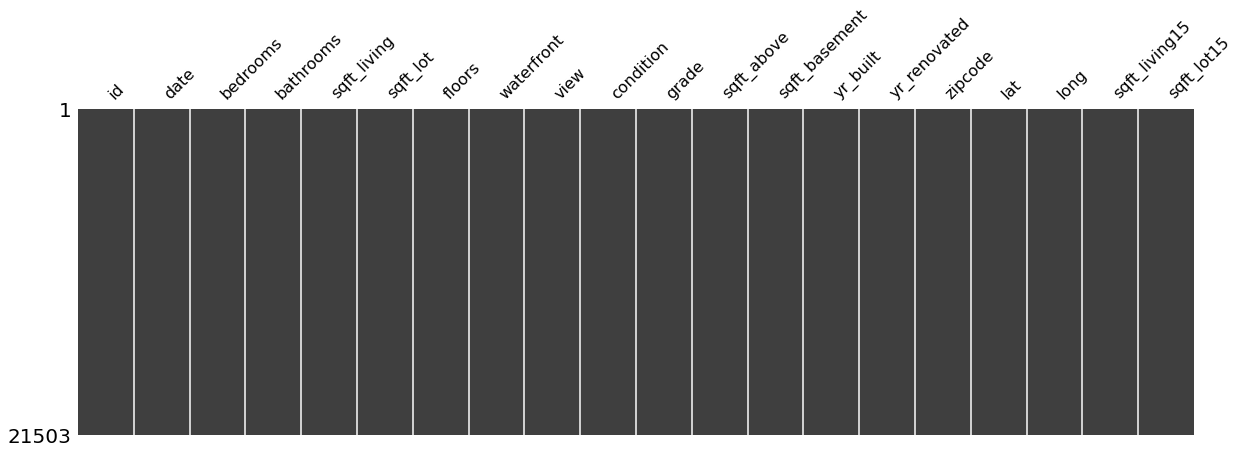

In [8]:
import missingno as msno # 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt 

# data에 결손치를 missingno 라이브러리를 이용하여 시각화 해보세요.
train_data_path = 'kaggle-kakr-housing-data/train.csv'
test_data_path = 'kaggle-kakr-housing-data/test.csv'

data = pd.read_csv(train_data_path)
sub = pd.read_csv(test_data_path)

y = data['price']

data = pd.DataFrame(data).drop('price', axis=1)
data = pd.concat((data, sub), axis=0) 

missing = data.isna().sum()
########################
### 미션 코드작성 3-2 #####
########################

msno.matrix(data, figsize=(20,6), sparkline=False)
plt.show()

### id, date 변수 정리하기

**id컬럼 제거하기**

우리의 목표는 `price`를 예측하는 것이기 때문에 필요없는 `id`를 제거하겠습니다. 그전에 제출할때 대비하여 `sub_id` 변수에 `id` 컬럼을 저장해 두고 지우겠습니다.

In [9]:
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

NameError: name 'train_len' is not defined

**date 컬럼 자르기**

date 컬럼의 값을 보면 다음과 같은 형식으로 되어있는 것을 확인할 수 있습니다.
- 예시 : `20141013T000000`

우리는 연/월 데이터만 사용하기 위해 `201410` 까지 자르기 변환을 수행할 것 입니다. 이를 위해서 아래의 코드를 실행합니다.

In [ ]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))
data.head()

### 각 변수들의 분포 확인 및 변환하기

전체 데이터들의 분포를 확인합니다.
특히 너무 치우친 분포를 가지는 컬럼의 경우 모델이 결과를 예측하는 데에 좋지 않은 영향을 미치므로 다듬는 작업을 합니다.

아래 시각화 코드는 id 컬럼과 date컬럼을 제외한 18개 컬럼에 대해 한 번에 모든 그래프의 분포를 그려주는 코드입니다.
9행 2열의 subplot에 그래프를 그리기 위해 2중 for문을 사용하고 있군요.

그래프의 종류는 [sns.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)을 사용합니다.
kdeplot은 이산(discrete) 데이터의 경우에도 부드러운 곡선으로 전체 분포를 확인할 수 있도록 하는 시각화 함수입니다.


In [ ]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요.

# date 변수(count==0인 경우)는 제외하고 분포를 확인
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

위 그래프 중에서는 `bedrooms`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`, `sqft_living15`, `sqft_lot15` 변수가 한쪽으로 치우친 경향을 보이는군요.

이렇게 한 쪽으로 치우친 분포의 경우에는 로그 변환(log-scaling)을 통해 데이터 분포를 정규분포에 가깝게 만들 수 있습니다.




### 로그변환 수행하기 (log-scaling)
아래와 같이 치우친 컬럼들을 `skew_columns` 리스트 안에 담고, 모두 [`np.log1p()`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html)를 활용해서 로그 변환을 해주도록 하겠습니다. `numpy.log1p()`함수는 입력배열의 각 요소에 대해 자연로그 log(1+x)을 반환해 주는 함수 입니다.

In [10]:
# 치우친 분포의 컬럼을 저장해 두기
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

########################
### 미션 코드작성 4 #######
########################

for c in skew_columns:
    data[c] = np.log1p(df[c])

NameError: name 'np' is not defined

log(1+x)변환을 완료하셨나요? 취우쳐 있던 `skew_colums`만을 다시 `sns.kdeplot`으로 출력해보도록 하겠습니다. 이전 출력보다 치우침이 줄어드는것이 확인 되었다면 미션 4를 잘 구현하신것 입니다.


In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

그렇다면 왜 로그 변환은 분포의 치우침을 줄어들게 만드는 걸까요?
이는 로그 함수의 형태를 보면 알 수 있습니다. 아래의 일반적인 로그 함수를 살펴봅시다.

In [ ]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

위와 같은 로그 함수의 특징은 다음과 같습니다.

- 0<x<1 범위에서는 기울기가 매우 가파릅니다. 즉, x의 구간은 (0,1)로 매우 짧은 반면, y의 구간은 (−∞,0)으로 매우 큽니다.
- 따라서 0에 가깝게 모여있는 값들이 x로 입력되면, 그 함수값인 y 값들은 매우 큰 범위로 벌어지게 됩니다. 즉, 로그 함수는 0에 가까운 값들이 조밀하게 모여있는 입력값을, 넓은 범위로 펼칠 수 있는 특징을 가집니다.
- 반면, x값이 점점 커짐에 따라 로그 함수의 기울기는 급격히 작아집니다. 이는 곧 큰 x값들에 대해서는 y값이 크게 차이나지 않게 된다는 뜻이고, 따라서 넓은 범위를 가지는 x를 비교적 작은 y값의 구간 내에 모이게 하는 특징을 가집니다.

위와 같은 특성 때문에 한 쪽으로 몰려있는 분포에 로그 변환을 취하게 되면 넓게 퍼질 수 있는 것이죠.

왜 한쪽으로 치우친 분포를 로그 변환을 취하게 되면 정규분포 모양으로 고르게 분포하게 될 수 있는지 이해가 되시나요? 그렇다면 우리가 맞추어야 할 타겟인 집의 가격, 즉 `data[price]`의 분포를 로그 변환했을 때 결과를 유추해봅시다. 원래 price의 분포는 다음과 같습니다.

In [ ]:
sns.kdeplot(y) # y는 미션 2에서 price를 저장하고 있음.
plt.show()

직접 확인해봅시다!

In [ ]:
y_log_transformation = np.log1p(y) # 미션4의 힌트가 되겠네요 ^^

sns.kdeplot(y_log_transformation)
plt.show()

확실히 아름다운 정규분포의 모양으로 가까워진 것으로 보입니다!

### 다시 학습데이터와 테스트 데이터 분리하기

여기까지 로그 변환이 필요한 데이터에 대해 처리를 마무리하였으니, 아래와 같이 전체 데이터를 다시 나누어 줍니다.

위에서 저장해두었던 `train_len`을 인덱스로 활용해서 `:train_len`까지는 학습 데이터, 즉 `x`에 저장하고, `train_len:` 부터는 실제로 추론을 해야 하는 테스트 데이터, 즉 `sub` 변수에 저장합니다.

In [ ]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

여러분, 이제 데이터 준비를 마쳤습니다. 다음 주에는 실제 모델을 적용하여 price를 예측해보고 그 결과를 캐글 대회에 제출해보도록 하겠습니다.

ALL RIGHTS RESERVED. (C)NAVER Connect Foundation.